In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import joblib

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# survivial rate
survival_count = df['Survived'].value_counts()
survival_count

0    549
1    342
Name: Survived, dtype: int64

In [5]:
print(f'Survival rate = {survival_count.values[1]/sum(survival_count):.2%}')

Survival rate = 38.38%


<AxesSubplot:ylabel='Frequency'>

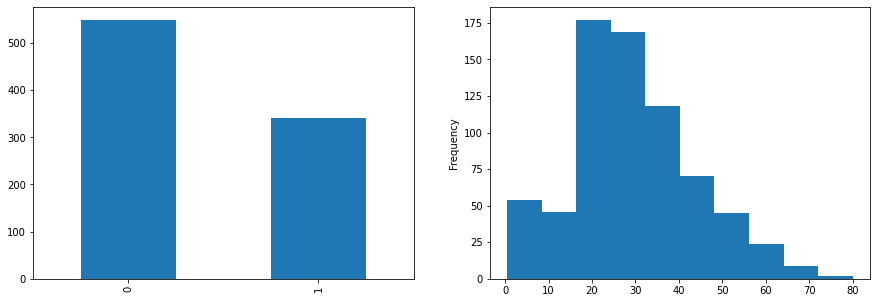

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

survival_count.plot.bar(ax=ax[0])
df['Age'].plot.hist(ax=ax[1])

In [13]:
# load model
tree_clf = joblib.load("tree-clf.pickle")

In [14]:
# you can see the features, preprocessors and decision tree parameters
tree_clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Fare',
                                                   'Parch']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
           

In [15]:
# make prediction
# the input has to be a dataframe, which is constructed from a python dictionary
# Note the feature names and ORDER must match the training data dataframe
passenger1 = pd.DataFrame(
    {
        'Pclass': [3],
        'Sex': ['male'], 
        'Age': [23],
        'SibSp': [0],
        'Parch': [0],
        'Fare': [5.5],
        'Embarked': ['S'],
    }
)
passenger1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,23,0,0,5.5,S


In [16]:
passenger2 = pd.DataFrame(
    {
        'Pclass': [1],
        'Sex': ['female'], 
        'Age': [21],
        'SibSp': [0],
        'Parch': [0],
        'Fare': [80],
        'Embarked': ['S'],
    }
)
passenger2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,female,21,0,0,80,S


In [17]:
pred1 = tree_clf.predict(passenger1)
pred1

array([0])

In [18]:
pred2 = tree_clf.predict(passenger2)
pred2

array([1])

In [19]:
if pred1[0] == 0:
    msg = 'This passenger is predicted to be: died'
else:
    msg = 'This passenger is predicted to be: survived'

print(msg)

This passenger is predicted to be: died
